## Importing libraries

In [15]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt


## Adding the dataset path 

In [16]:
file_path="/Users/mayurimamdi/Downloads/social_media_viral_content_dataset.csv"

In [17]:
df=pd.read_csv(file_path)

## Analyzing the dataset 

In [18]:
df.head(10)

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,15800,861,0.0598,0.464,1
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,11289,54887,0.0695,-0.800,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,47196,44132,0.1702,0.416,0
3,SM_100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,5316,83105,0.0903,0.223,1
5,SM_100005,Instagram,carousel,Sports,hi,Brazil,2024-11-01 00:00:00,#tech #music,6513472,465248,27485,25659,0.0796,-0.907,1
6,SM_100006,X,text,Education,hi,UK,2024-06-09 00:00:00,#tech #ai,65481,2847,194,84655,1.3393,-0.235,0
7,SM_100007,X,text,Technology,es,Pakistan,2024-07-26 00:00:00,#trending #tech #news,2961423,329047,31556,11395,0.1256,0.215,1
8,SM_100008,YouTube Shorts,text,Sports,es,Pakistan,2024-03-03 00:00:00,#music #tech #news #trending,3916736,489592,14507,87314,0.1510,0.884,1
9,SM_100009,YouTube Shorts,video,Politics,en,US,2024-10-05 00:00:00,#music #trending #ai #viral #news,3116477,239729,8438,43002,0.0934,-0.968,1


In [19]:
df.shape

(2000, 15)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          2000 non-null   object 
 1   platform         2000 non-null   object 
 2   content_type     2000 non-null   object 
 3   topic            2000 non-null   object 
 4   language         2000 non-null   object 
 5   region           2000 non-null   object 
 6   post_datetime    2000 non-null   object 
 7   hashtags         2000 non-null   object 
 8   views            2000 non-null   int64  
 9   likes            2000 non-null   int64  
 10  comments         2000 non-null   int64  
 11  shares           2000 non-null   int64  
 12  engagement_rate  2000 non-null   float64
 13  sentiment_score  2000 non-null   float64
 14  is_viral         2000 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 234.5+ KB


In [49]:
df['platform'].unique()

array(['Instagram', 'YouTube Shorts', 'X', 'TikTok'], dtype=object)

In [50]:
df['topic'].unique()

array(['Sports', 'Technology', 'Politics', 'Education', 'Entertainment',
       'Lifestyle'], dtype=object)

In [51]:
df['language'].value_counts()

language
en    420
ur    405
fr    404
hi    392
es    379
Name: count, dtype: int64

In [52]:
df['region'].value_counts()

region
US          428
India       406
Brazil      402
UK          385
Pakistan    379
Name: count, dtype: int64

## Dataset cleaning processing 

In [47]:
df.duplicated().sum()

np.int64(0)

In [46]:
df.isnull().sum()

post_id            0
platform           0
content_type       0
topic              0
language           0
region             0
post_datetime      0
hashtags           0
views              0
likes              0
comments           0
shares             0
engagement_rate    0
sentiment_score    0
is_viral           0
dtype: int64

Since there is not duplicates or no null values we are skipping the cleaning part 

## Feature Engineering 

#### Changing the post id into integer 

In [ ]:
df['post_id'].str.split('_').str[1]

0       100000
1       100001
2       100002
3       100003
4       100004
         ...  
1995    101995
1996    101996
1997    101997
1998    101998
1999    101999
Name: post_id, Length: 2000, dtype: object

In [55]:
df['post_id']=df['post_id'].str.split('_').str[1]

In [66]:
df['post_id']=df['post_id'].astype(int)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          2000 non-null   int64  
 1   platform         2000 non-null   object 
 2   content_type     2000 non-null   object 
 3   topic            2000 non-null   object 
 4   language         2000 non-null   object 
 5   region           2000 non-null   object 
 6   post_datetime    2000 non-null   object 
 7   hashtags         2000 non-null   object 
 8   views            2000 non-null   int64  
 9   likes            2000 non-null   int64  
 10  comments         2000 non-null   int64  
 11  shares           2000 non-null   int64  
 12  engagement_rate  2000 non-null   float64
 13  sentiment_score  2000 non-null   float64
 14  is_viral         2000 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 234.5+ KB


#### Changing platform into numeric values // categorical to numeric

we need to do one hot encoding as label encoding will not be better for predictions 

In [58]:
platform_dummies=pd.get_dummies(df['platform']).astype(int)

In [59]:
platform_dummies.head(10)

,Instagram,TikTok,X,YouTube Shorts
0,1,0,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1
5,1,0,0,0
6,0,0,1,0
7,0,0,1,0
8,0,0,0,1
9,0,0,0,1


In [61]:
df.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
0,100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,15800,861,0.0598,0.464,1
1,100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,11289,54887,0.0695,-0.800,1
2,100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,47196,44132,0.1702,0.416,0
3,100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1
4,100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,5316,83105,0.0903,0.223,1


In [68]:
df_p = pd.concat([df,platform_dummies], axis = 1)

In [69]:
df_p.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral,Instagram,TikTok,X,YouTube Shorts
0,100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,15800,861,0.0598,0.464,1,1,0,0,0
1,100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,11289,54887,0.0695,-0.800,1,1,0,0,0
2,100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,47196,44132,0.1702,0.416,0,0,0,0,1
3,100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1,0,0,1,0
4,100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,5316,83105,0.0903,0.223,1,0,0,0,1


#### lets do the same for Region as well 

In [79]:
region_dummies=pd.get_dummies(df_p['region']).astype(int)

In [80]:
df_r=pd.concat([df_p,region_dummies], axis=1)

In [81]:
df_r.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,...,is_viral,Instagram,TikTok,X,YouTube Shorts,Brazil,India,Pakistan,UK,US
0,100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,...,1,1,0,0,0,0,0,0,1,0
1,100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,...,1,1,0,0,0,1,0,0,0,0
2,100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,...,0,0,0,0,1,0,0,0,1,0
3,100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,...,1,0,0,1,0,0,0,0,0,1
4,100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,...,1,0,0,0,1,0,0,0,0,1


In [83]:
content_dummies=pd.get_dummies(df_r['content_type']).astype(int)

In [84]:
df_c=pd.concat([df_r,content_dummies],axis=1)

In [85]:
df_c.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,...,YouTube Shorts,Brazil,India,Pakistan,UK,US,carousel,image,text,video
0,100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,...,0,0,0,0,1,0,0,0,1,0
1,100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,...,0,1,0,0,0,0,1,0,0,0
2,100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,...,1,0,0,0,1,0,0,0,0,1
3,100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,...,0,0,0,0,0,1,0,0,1,0
4,100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,...,1,0,0,0,0,1,0,0,1,0


In [86]:
topic_dummies=pd.get_dummies(df_c['topic']).astype(int)

In [87]:
df_t=pd.concat([df_c,topic_dummies], axis=1)

In [88]:
df_t.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,...,carousel,image,text,video,Education,Entertainment,Lifestyle,Politics,Sports,Technology
0,100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,...,0,0,1,0,0,0,0,0,1,0
1,100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,...,1,0,0,0,0,0,0,0,1,0
2,100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,...,0,0,0,1,0,0,0,0,0,1
3,100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,...,0,0,1,0,0,0,0,1,0,0
4,100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,...,0,0,1,0,1,0,0,0,0,0


In [100]:
df_t['year']=df_t['post_datetime'].str.split('-').str[0].astype(int)

In [101]:
df_t['Month']=df_t['post_datetime'].str.split('-').str[1].astype(int)

In [102]:
df_t['day']=df_t['post_datetime'].str.split('-').str[2].str.split(' ').str[0].astype(int)

In [103]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          2000 non-null   int64  
 1   platform         2000 non-null   object 
 2   content_type     2000 non-null   object 
 3   topic            2000 non-null   object 
 4   language         2000 non-null   object 
 5   region           2000 non-null   object 
 6   post_datetime    2000 non-null   object 
 7   hashtags         2000 non-null   object 
 8   views            2000 non-null   int64  
 9   likes            2000 non-null   int64  
 10  comments         2000 non-null   int64  
 11  shares           2000 non-null   int64  
 12  engagement_rate  2000 non-null   float64
 13  sentiment_score  2000 non-null   float64
 14  is_viral         2000 non-null   int64  
 15  Instagram        2000 non-null   int64  
 16  TikTok           2000 non-null   int64  
 17  X             

In [104]:
lang_dummies=pd.get_dummies(df_t['language']).astype(int)

In [105]:
tf_l=pd.concat([df_t,lang_dummies], axis=1)

In [106]:
tf_l.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,...,Sports,Technology,year,Month,day,en,es,fr,hi,ur
0,100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,...,1,0,2024,12,10,0,0,0,0,1
1,100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,...,1,0,2024,10,13,0,0,0,0,1
2,100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,...,0,1,2024,5,3,0,0,0,0,1
3,100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,...,0,0,2024,8,4,0,0,0,0,1
4,100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,...,0,0,2024,3,28,0,1,0,0,0


In [109]:
tf_l.drop(columns=['platform','content_type','topic','language','post_datetime','hashtags','region'],axis=1, inplace=True)

In [110]:
tf_l.shape

(2000, 35)

In [111]:
tf_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          2000 non-null   int64  
 1   views            2000 non-null   int64  
 2   likes            2000 non-null   int64  
 3   comments         2000 non-null   int64  
 4   shares           2000 non-null   int64  
 5   engagement_rate  2000 non-null   float64
 6   sentiment_score  2000 non-null   float64
 7   is_viral         2000 non-null   int64  
 8   Instagram        2000 non-null   int64  
 9   TikTok           2000 non-null   int64  
 10  X                2000 non-null   int64  
 11  YouTube Shorts   2000 non-null   int64  
 12  Brazil           2000 non-null   int64  
 13  India            2000 non-null   int64  
 14  Pakistan         2000 non-null   int64  
 15  UK               2000 non-null   int64  
 16  US               2000 non-null   int64  
 17  carousel      

## EDA

### 1] Platform Popularity & Engagement

#### 1. Which social media platforms are the most popular based on views and likes?
#### 2. How does engagement differ across platforms?


In [24]:
count=df.value_counts()

In [41]:
platform_counts=df['platform'].value_counts().reset_index()
platform_names=df['platform'].value_counts().index
platform_counts.columns = ['platform', 'post_count']

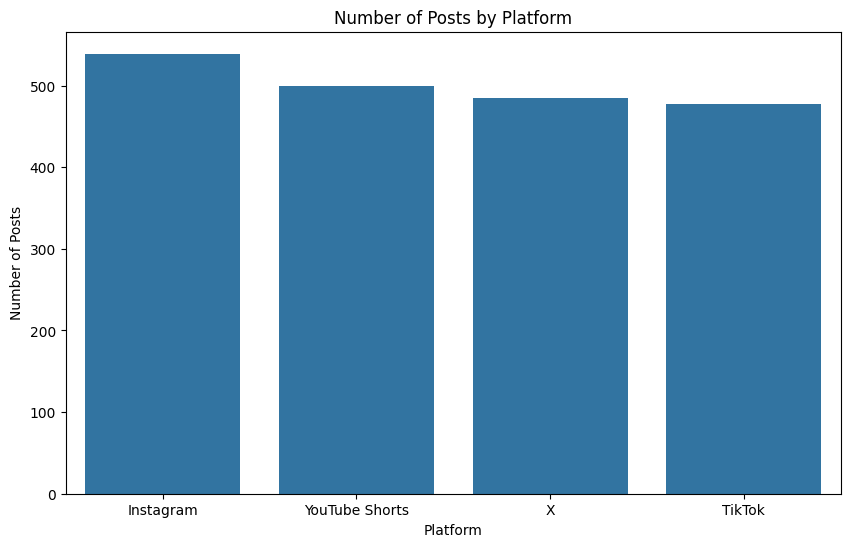

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_counts, x='platform', y='post_count')

plt.title("Number of Posts by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Posts")
plt.show()

In [43]:
platform_region_counts = (df[['platform', 'region']].value_counts().reset_index(name='post_count'))


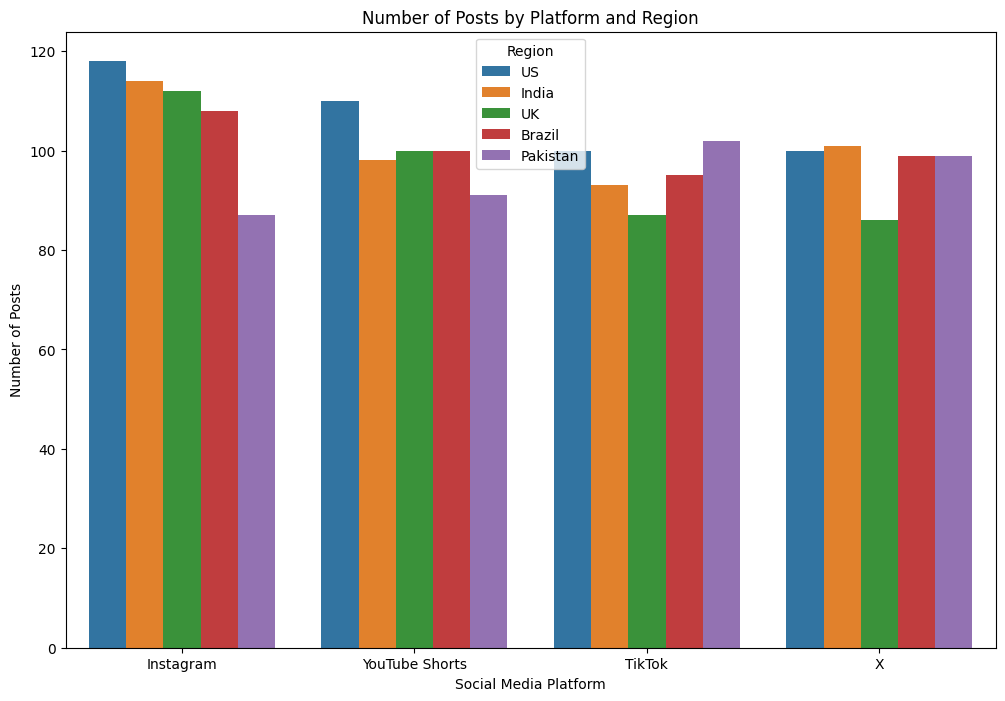

In [44]:
plt.figure(figsize=(12, 8))

sns.barplot(
    data=platform_region_counts,
    x='platform',
    y='post_count',
    hue='region'
)

plt.title("Number of Posts by Platform and Region")
plt.xlabel("Social Media Platform")
plt.ylabel("Number of Posts")
plt.legend(title="Region")
plt.show()


/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_45199/3629625981.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='platform',y='likes',hue='topic',data=df, estimator=np.median, ci=None)


<function matplotlib.pyplot.show(close=None, block=None)>

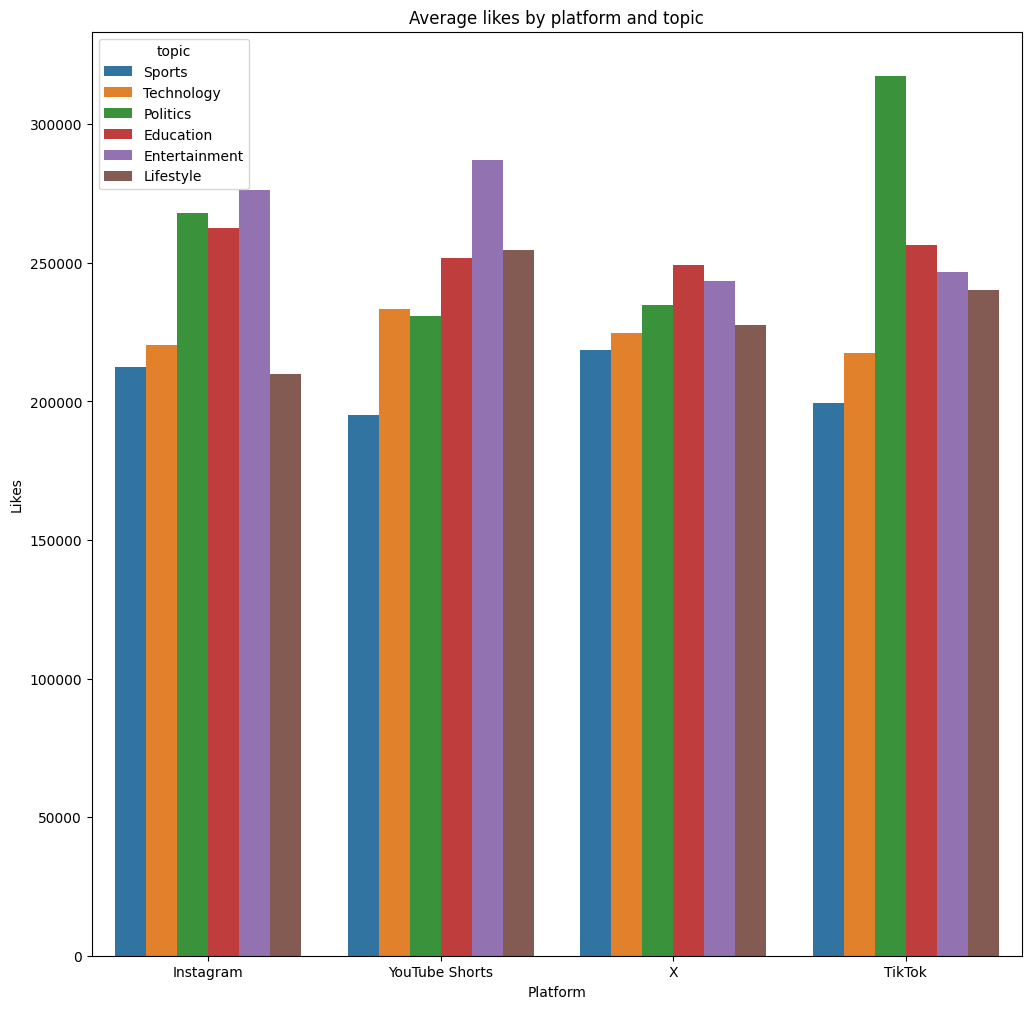

In [130]:
plt.figure(figsize=(12,12))
sns.barplot(x='platform',y='likes',hue='topic',data=df, estimator=np.median, ci=None)
plt.title("Average likes by platform and topic")
plt.xlabel("Platform")
plt.ylabel("Likes")
plt.show

In [138]:
df['views'].value_counts()

views
2319102     1
2002972     1
11371932    1
4374192     1
576785      1
           ..
12407925    1
7699224     1
8402352     1
6423696     1
3369429     1
Name: count, Length: 2000, dtype: int64

/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_45199/2180305502.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='platform', y='views', hue='content_type', ci=None)


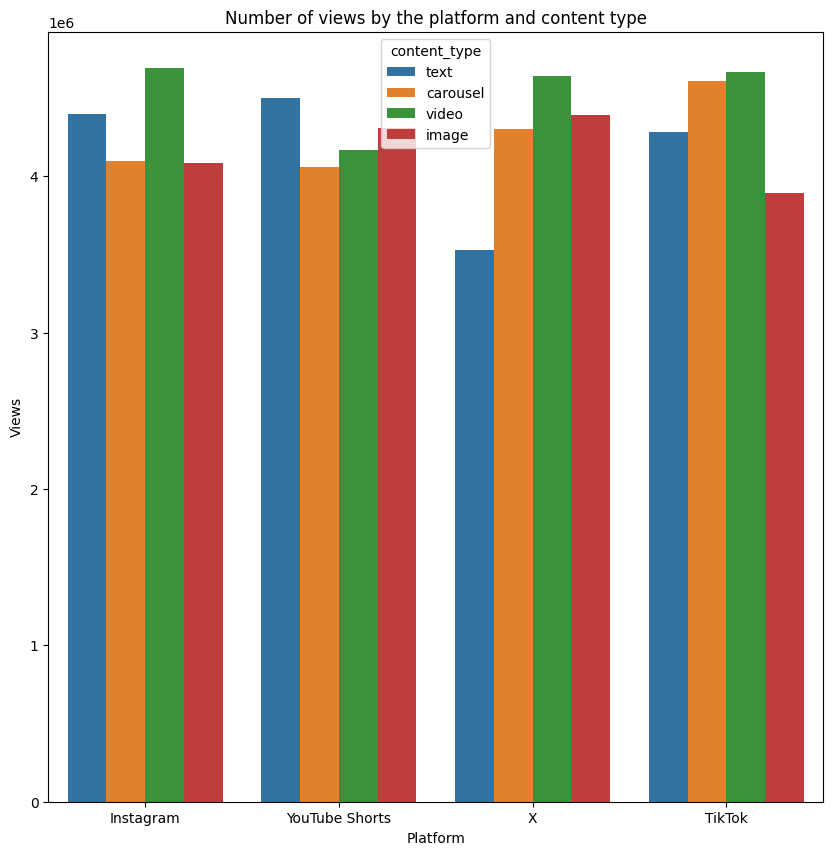

In [151]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, x='platform', y='views', hue='content_type', ci=None)
plt.title("Number of views by the platform and content type")
plt.xlabel("Platform")
plt.ylabel("Views")
plt.show()

/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_45199/806643315.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


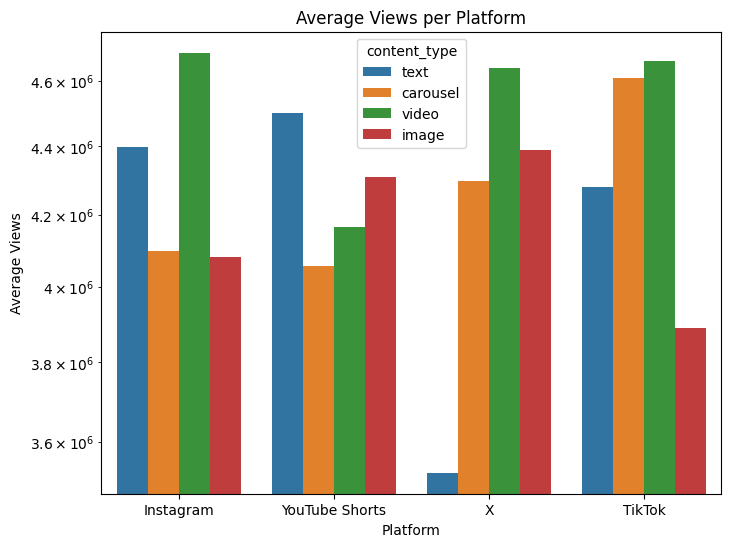

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(
    data=df,
    x='platform',
    y='views',
    hue='content_type',
    estimator=np.mean,
    ci=None
)

plt.title("Average Views per Platform")
plt.xlabel("Platform")
plt.ylabel("Average Views")
plt.yscale('log')  
plt.show()



### 2] Content, Topic & Region Performance
 
#### 1. Which content topics receive the highest number of likes?
#### 2. How does engagement vary by region?
#### 3. What combinations of topic and region perform best?

/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_45199/2221430143.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='content_type', y='likes',hue='region', ci=None)


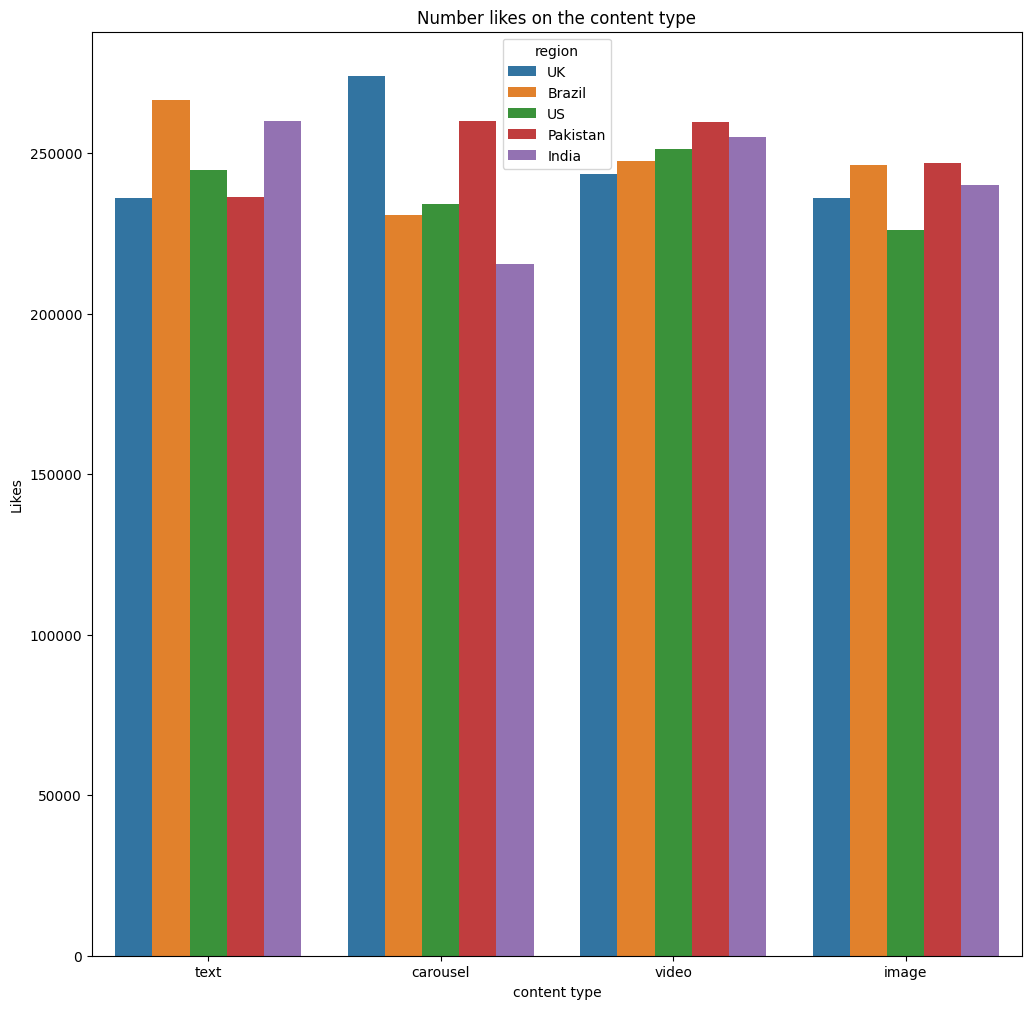

In [155]:
plt.figure(figsize=(12,12))
sns.barplot(data=df, x='content_type', y='likes',hue='region', ci=None)
plt.title("Number likes on the content type")
plt.xlabel("content type")
plt.ylabel("Likes")
plt.show()

/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_45199/52996586.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='region', y='likes', hue='comments', ci=None)


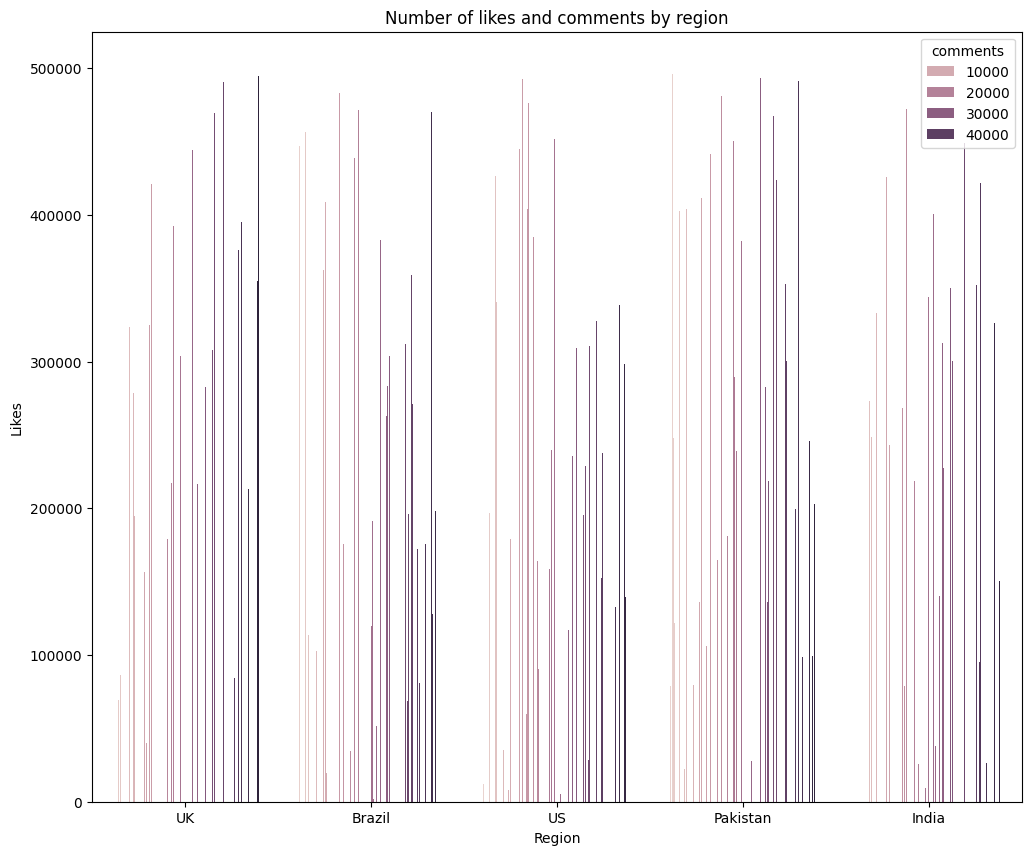

In [162]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x='region', y='likes', hue='comments', ci=None)
plt.title("Number of likes and comments by region")
plt.xlabel("Region")
plt.ylabel("Likes")
plt.show()

In [167]:
topic_region_perf = (
    df.groupby(['topic', 'region'])
      .agg(
          avg_views=('views', 'mean'),
          avg_likes=('likes', 'mean'),
          avg_comments=('comments', 'mean'),
          avg_share=('shares','mean'),
          avg_engagement=('engagement_rate', 'mean')
      )
      .reset_index()
)


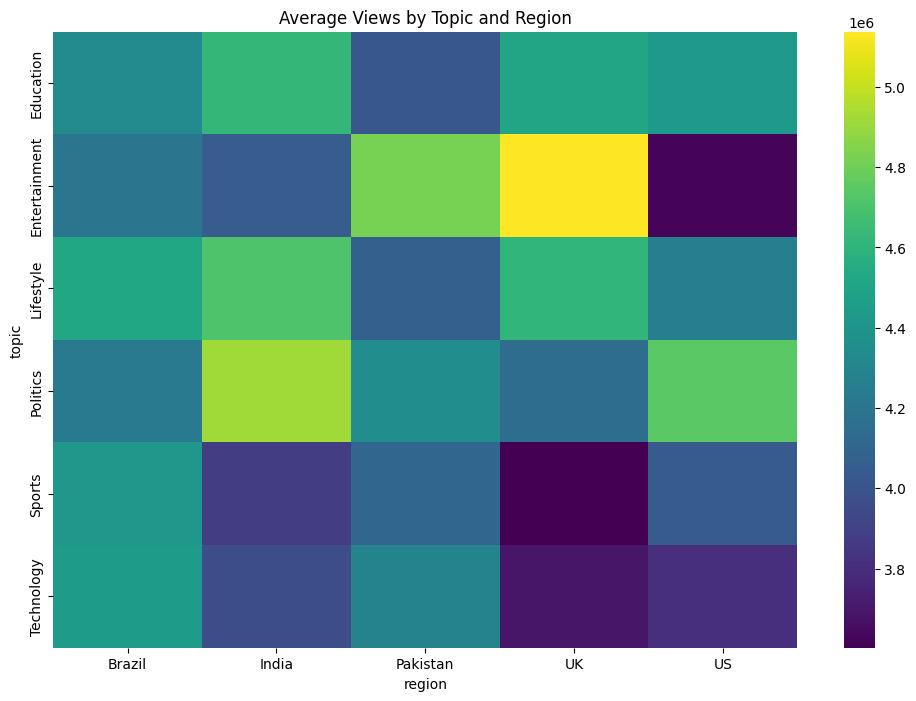

In [168]:
pivot_views = topic_region_perf.pivot(
    index='topic',
    columns='region',
    values='avg_views'
)

plt.figure(figsize=(12,8))
sns.heatmap(
    pivot_views,
    cmap='viridis'
)
plt.title("Average Views by Topic and Region")
plt.show()


In [157]:
df.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
0,100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,15800,861,0.0598,0.464,1
1,100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,11289,54887,0.0695,-0.800,1
2,100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,47196,44132,0.1702,0.416,0
3,100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1
4,100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,5316,83105,0.0903,0.223,1


### 3] Best Time of Post

####  Which time of day receives the most views and likes?


In [170]:
df['year']=df['post_datetime'].str.split('-').str[0].astype(int)

In [171]:
df['Month']=df['post_datetime'].str.split('-').str[1].astype(int)

In [173]:
df['day']=df['post_datetime'].str.split('-').str[2].str.split(' ').str[0].astype(int)

In [174]:
df.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral,year,Month,day
0,100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,15800,861,0.0598,0.464,1,2024,12,10
1,100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,11289,54887,0.0695,-0.800,1,2024,10,13
2,100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,47196,44132,0.1702,0.416,0,2024,5,3
3,100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1,2024,8,4
4,100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,5316,83105,0.0903,0.223,1,2024,3,28


/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_45199/2070885300.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Month', y='likes', ci=None, palette='Set1')
/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_45199/2070885300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Month', y='likes', ci=None, palette='Set1')


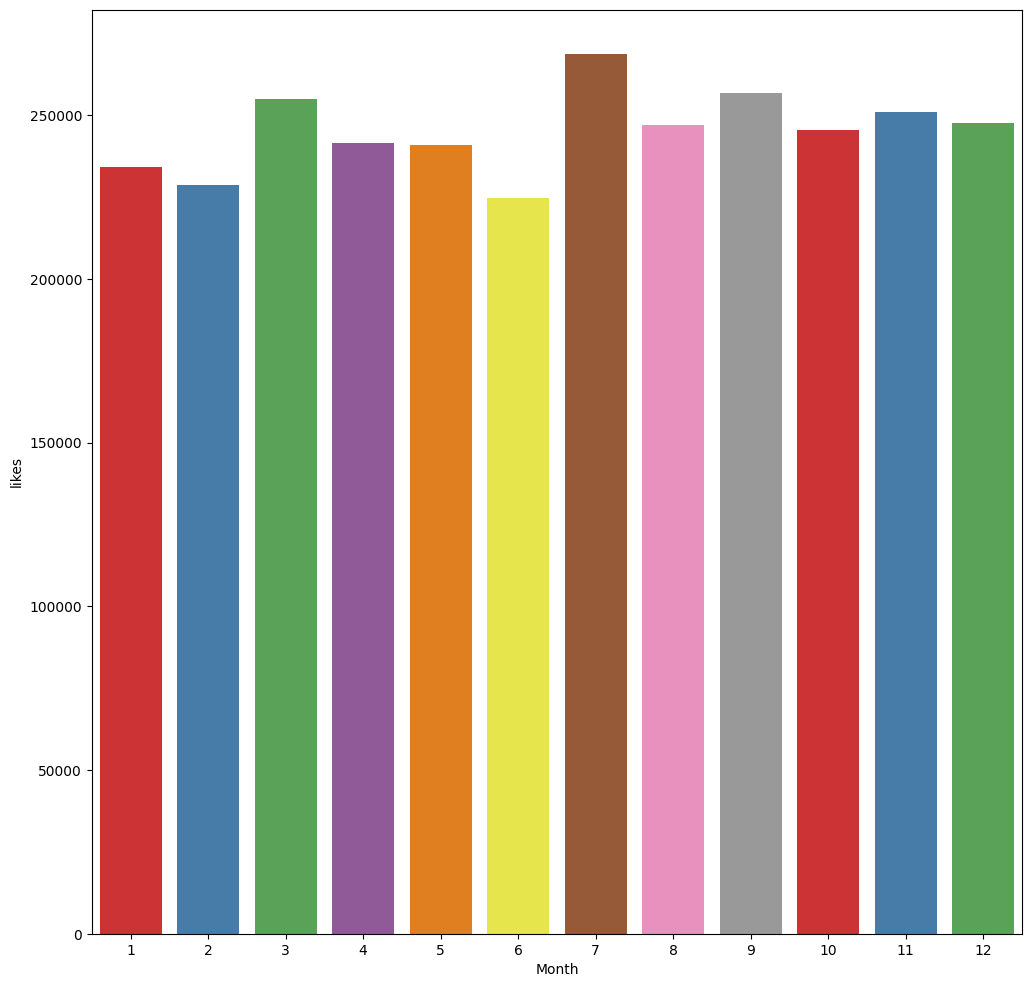

In [178]:
plt.figure(figsize=(12,12))
sns.barplot(data=df, x='Month', y='likes', ci=None, palette='Set1')
plt.show()

seems Month of july is more engaging 

so we will chcek which of that month is engaging 

/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_45199/3578004076.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_45199/3578004076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


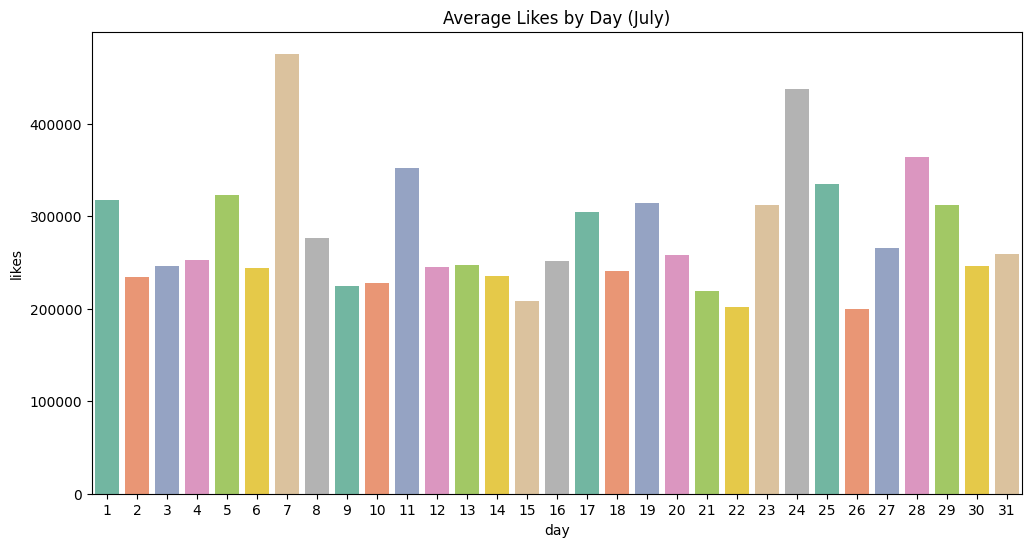

In [182]:
df_mon = df[df['Month'] == 7]

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_mon,
    x='day',
    y='likes',
    estimator=np.mean,
    ci=None,
    palette='Set2'
)
plt.title("Average Likes by Day (July)")
plt.show()


looks like day 7 of month july is more engaging 

/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_45199/117543825.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Month', y='views', ci=None, palette='Set1')
/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_45199/117543825.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Month', y='views', ci=None, palette='Set1')


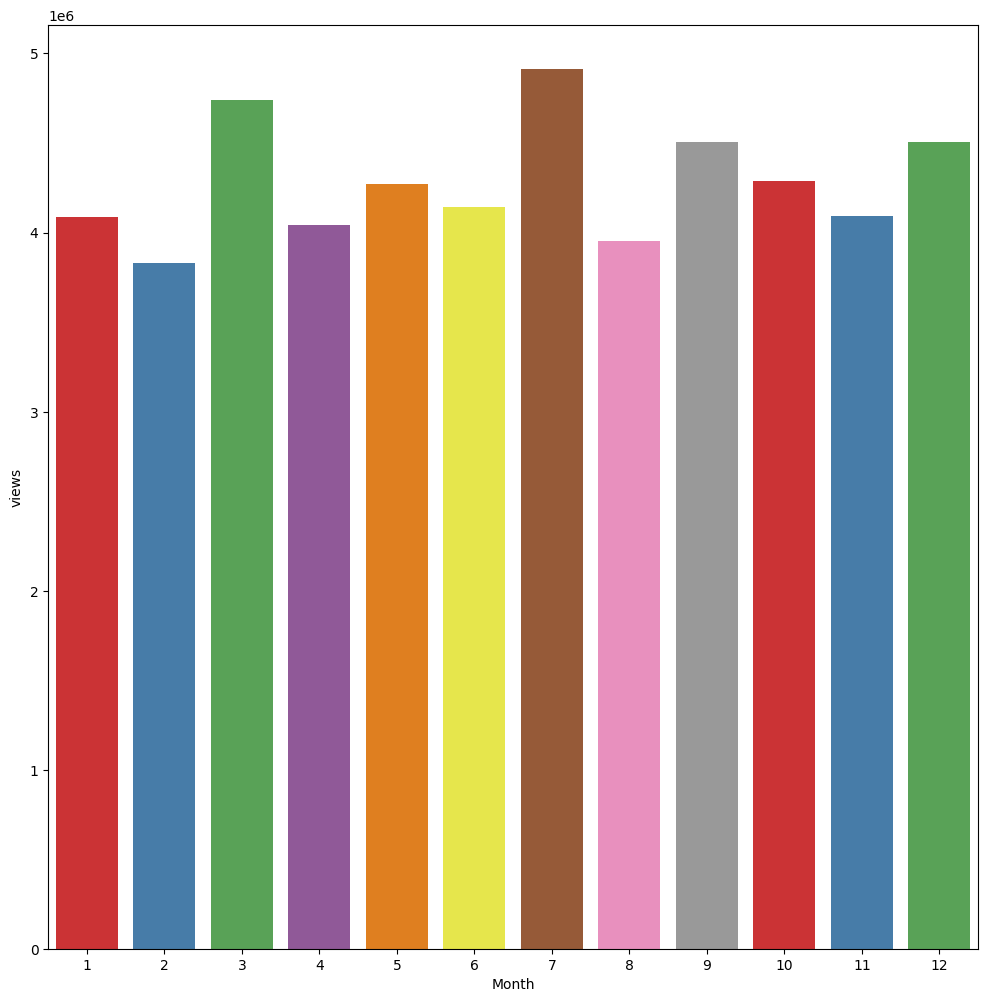

In [183]:
plt.figure(figsize=(12,12))
sns.barplot(data=df, x='Month', y='views', ci=None, palette='Set1')
plt.show()

/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_45199/1712046741.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_45199/1712046741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


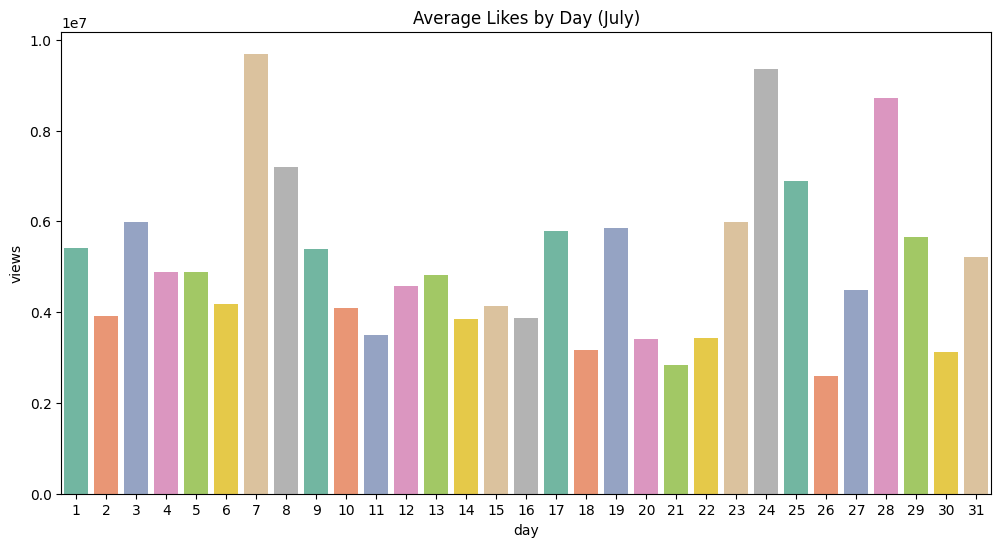

In [184]:
df_mon = df[df['Month'] == 7]

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_mon,
    x='day',
    y='views',
    estimator=np.mean,
    ci=None,
    palette='Set2'
)
plt.title("Average Likes by Day (July)")
plt.show()

looks like day 7 and 24 is more engaging on social media